<h1>Exploratory Data Analysis in Python </h1>
<ol>
    <li>Understanding the concepts of EDA.</li>
    <li>Creating visual methods to analyze data.</li>
    <li>Analyzing trends, patterns, relationships in data.</li>
 </ol>

## We will apply EDA to a real-world dataset by completing each task in the project:
<ol>
    <li>Defining EDA with an overview of the whole project.</li>
    <li>Importing libraries and Exploring the dataset.</li>
    <li>Checking missing values and Outliers.</li>
    <li>Creating visual methods to analyze the data.</li>
    <li>Analyzing trends, patterns, and relationships in the Data.</li>
</ol>

<h1>About the dataset</h1>
<p>We will be using insurance datat having 1339 record of following attributes</p>
<ul>
    <li>age: Age of the person</li>
    <li>sex: Gender of the person</li>
    <li>bmi: Body Mass Index</li>
    <li>Children: Number of children</li>
    <li>smoker: 0 for non-smoker, 1 for smoker</li>
    <li>region: Residence area </li>
    <li>charges: Insurance charges</li>
 </ul>

## Importing libraries

In [4]:
import numpy as np #linear algebra
import pandas as pd # daa preprocessing
import matplotlib.pyplot as plt #visualization
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy
sns.set() # setting the default seaborn style for our plots



In [6]:
#Read the Dataset
insurance_df = pd.read_csv("insurance.csv")

In [9]:
#Display the first few rows of the dataset
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<p>The given dataset has 1338 records with 7 attributes, 2 Integer type, 2 float type and 3 object type. </p>

## Checking missing values and outliers

In [14]:
#Check for the null values
insurance_df.isna().apply(pd.value_counts)

,age,sex,bmi,children,smoker,region,charges
False,1338,1338,1338,1338,1338,1338,1338


<p>Expected output: no missing values</p>

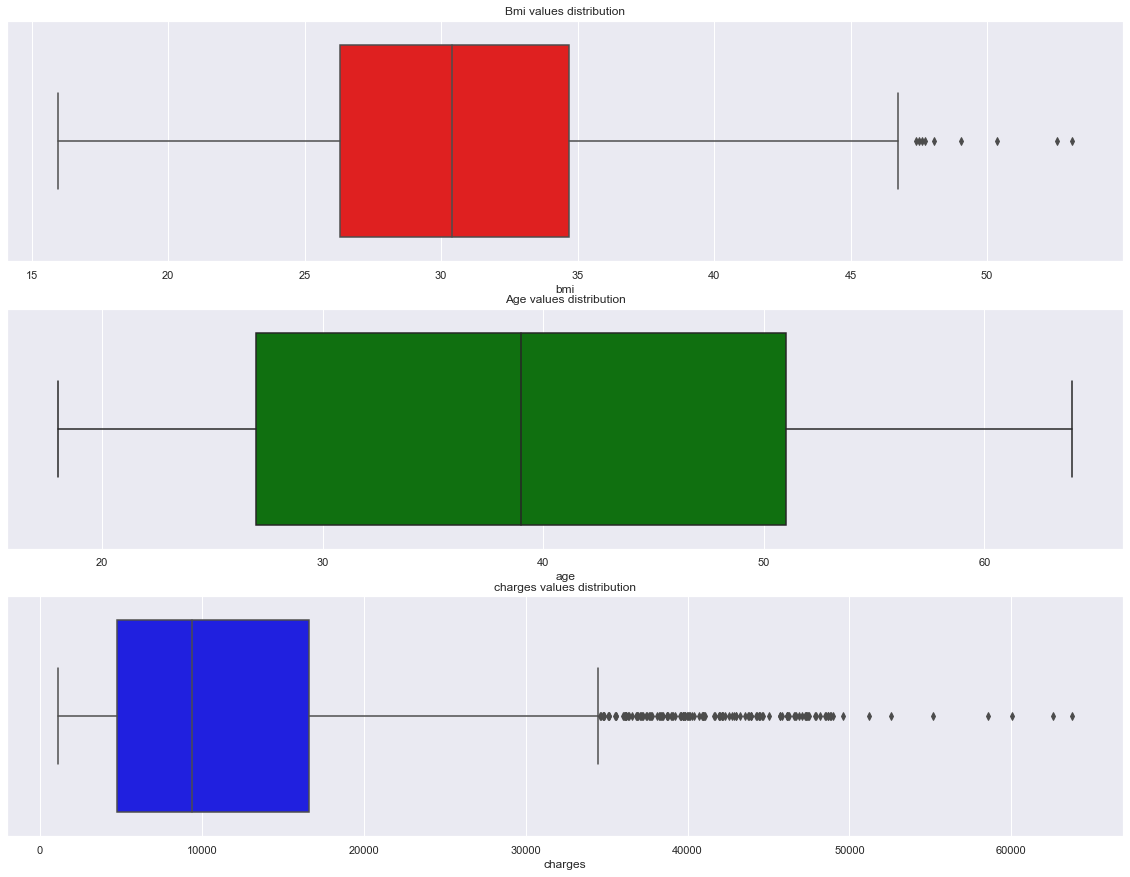

In [27]:
#check for outliers
plt.figure(figsize= (20,15))
plt.subplot(3, 1, 1)
sns.boxplot(x= insurance_df.bmi, color = 'red').set_title("Bmi values distribution")
plt.subplot(3, 1, 2)
sns.boxplot(x= insurance_df.age, color= 'green').set_title("Age values distribution")
plt.subplot(3, 1, 3)
sns.boxplot(x= insurance_df.charges, color= 'blue').set_title("charges values distribution")
plt.show()

<ol>
    <li>We have some extreme BMI values</li>
    <li>The charges are extremly skewed as it has lot of high values.</li>
    <li></li>
</ol>

In [32]:
#Brief summary of the dataset
insurance_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


<ol>
    <li>All statistics seems resonable</li>
    <li> Most people have 2 or less children (As seen in 75% column)</li>
    <li>Claimed charges are highly skewed as most people need only min basic care and few people suffer from diseases which require more amount.</li>
</ol>

## Creating visual methods to analyze the data

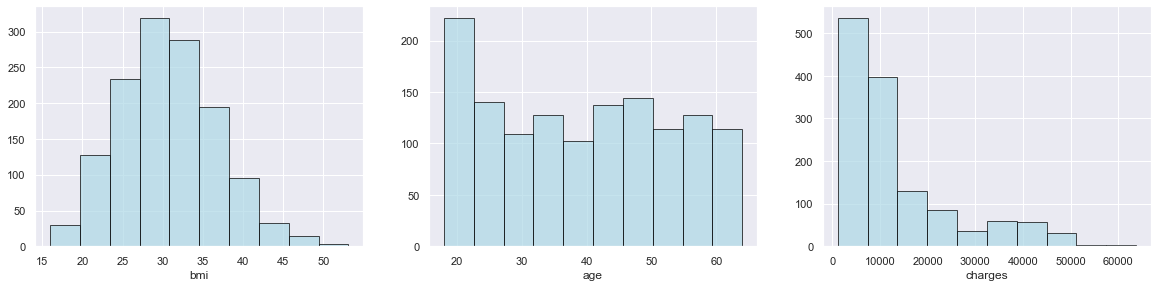

In [35]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(insurance_df.bmi, color = "lightblue", edgecolor = 'black', alpha = 0.7)
plt.xlabel('bmi')

plt.subplot(3,3,2)
plt.hist(insurance_df.age, color = "lightblue", edgecolor = "black", alpha = 0.7)
plt.xlabel('age')

plt.subplot(3,3,3)
plt.hist(insurance_df.charges, color = "lightblue", edgecolor = "black", alpha = 0.7)
plt.xlabel('charges')
plt.show()

<p>Observations:</p>
<ul>
    <li>Bmi looks normally distributed.</li>
    <li>Age looks uniformly distributed.</li>
    <li>Charged are highly skewed towards left. </li>
</ul>

In [50]:
# analyzing the skewness of attributes
skewness = pd.DataFrame({'Skewness': [stats.skew(insurance_df.bmi),stats.skew(insurance_df.age),stats.skew(insurance_df.charges)]}, index = ['bmi','age','charges'])
skewness



,Skewness
bmi,0.283729
age,0.055610
charges,1.514180


<p>Observations:</p>
<ul>
    <li>Skewness of bmi is low</li>
    <li>Age is uniformly distributed and have very low skewness </li>
    <li>Charged are highly skewed , >1 </li>
</ul>

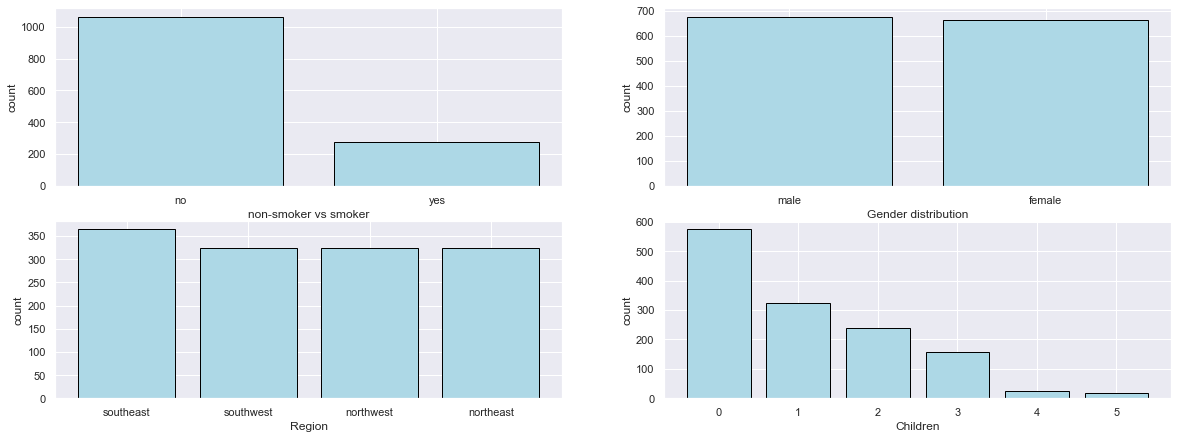

In [82]:
#visualizing data for further analysis
plt.figure(figsize = (20,15))
x = insurance_df["smoker"].value_counts().index
y = [insurance_df["smoker"].value_counts()[i] for i in x]
plt.subplot(4,2,1)
plt.bar(x,y, align = "center", color = "lightblue", edgecolor = "black")
plt.xlabel("non-smoker vs smoker")
plt.ylabel("count")

x = insurance_df["sex"].value_counts().index
y = [insurance_df["sex"].value_counts()[i] for i in x]
plt.subplot(4,2,2)
plt.bar(x,y, align = "center", color = "lightblue", edgecolor = "black")
plt.xlabel("Gender distribution")
plt.ylabel("count")


x = insurance_df["region"].value_counts().index
y = [insurance_df["region"].value_counts()[i] for i in x]

plt.subplot(4,2,3)
plt.bar(x,y, align = "center", color = "lightblue", edgecolor = "black")
plt.xlabel("Region")
plt.ylabel("count")


x = insurance_df["children"].value_counts().index
y = [insurance_df["children"].value_counts()[i] for i in x]

plt.subplot(4,2,4)
plt.bar(x,y, align = "center", color = "lightblue", edgecolor = "black")
plt.xlabel("Children")
plt.ylabel("count")
plt.show()

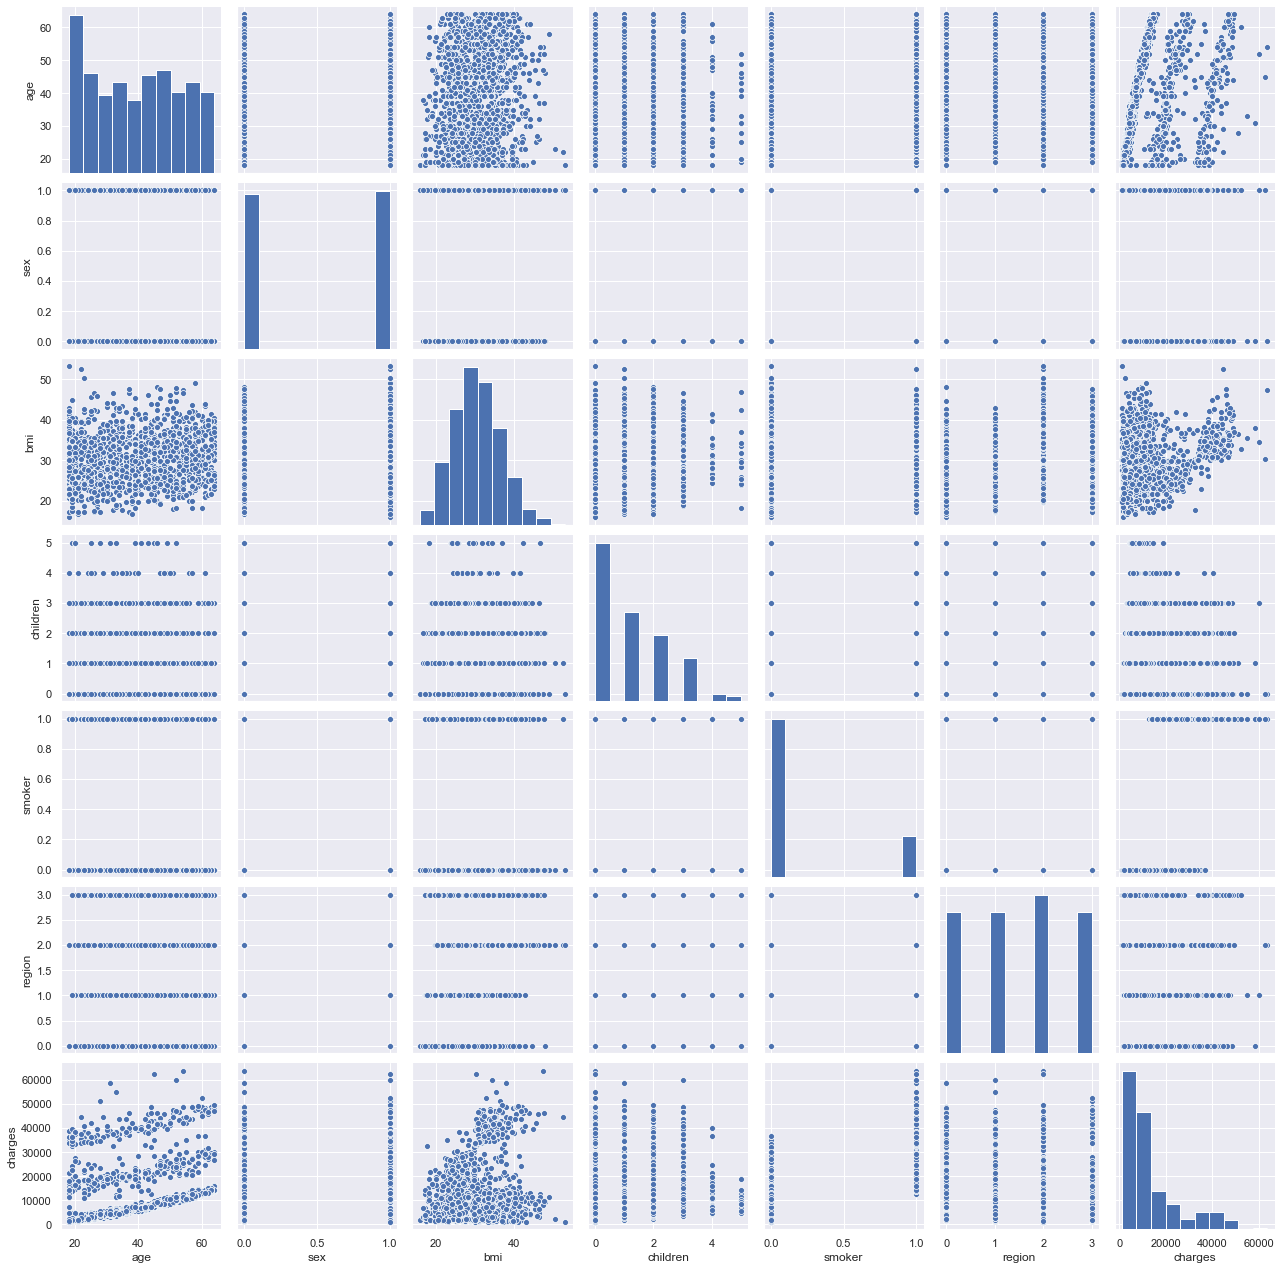

In [84]:
insurance_df_encoded = copy.deepcopy(insurance_df)
insurance_df_encoded.loc[:,['sex', 'smoker', 'region']] = insurance_df_encoded.loc[:,['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform) 

sns.pairplot(insurance_df_encoded)  # pairplot
plt.show()

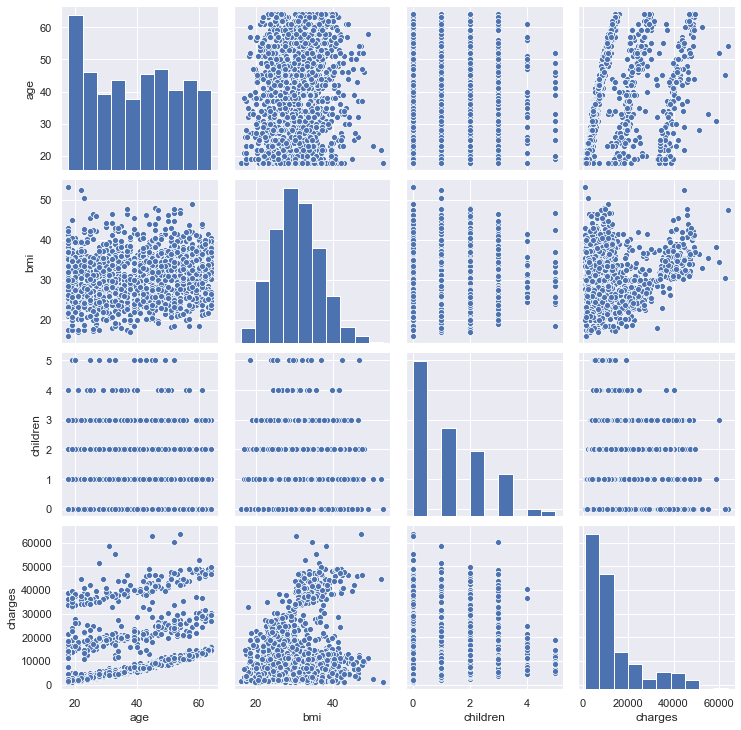

In [86]:
sns.pairplot(
    insurance_df, 
)